# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:** First of all, our smartcab is not yet moving. I'm sure this is because we haven't created a policy or strategy for it to choose an action. Other cars are moving, though, and the lights at the intersections are switching between red and green. In terms of rewards, the simulation is giving positive rewards when the car's default behavior, do nothing, is appropriate, for example idling when the light is red. It gives negative rewards, though, when the car should be going, for example, when the light is green and there's no oncoming traffic or there is oncoming traffic that isn't trying to turn left (it seems okay to idle if the oncoming traffic is trying to turn left).

One thing I noted that's interesting and I look forward to exploring is that the reward value isn't constant even though the reported action is the same. For example, I have three successive actions of "Agent idled at a green light with no oncoming traffic." and was rewarded -5.99, -4.08, and -4.92, respectively. I assume that the reward is more complicated and is taking into account other things than just light color and a binary oncoming traffic or no oncoming traffic. 

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

In agent.py, three flags that can be set on the LearningAgent class (there are other flags you can set on the environment and simulator in this file) are: *learning*, *epsilon*, and *alpha*—*learning* determines whether the agent is expected to learn; *epsilon* determines the random exploration factor; and *alpha* sets the learning factor.

When an agent peforms an action—after the environment calls Agent.update() for all agents in the Environment.step() function—the Environment.act() function is called. One thing I noted is that it appears that act() is called after each individual agent acts, not after all agents have chosen their action. While it does update state before the next agent chooses an action, it's not how the real world works, e.g. multiple agents are choosing actions in parallel and the resulting state (and rewards) are a result of many simultaneous agents choosing actions. This simulator seems to be allowing serial agent action selection.

In simulator.py, render_text() prints the text-based simulation data to the terminal. The render() function, on the other hand, drives the GUI representation of the simulation, using pygame. It should be noted that render_text() gets called regardless of if there is a GUI simulation available.

Finally in planner.py, the next_waypoint() function considers the East-West direction first, then considers North-South.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


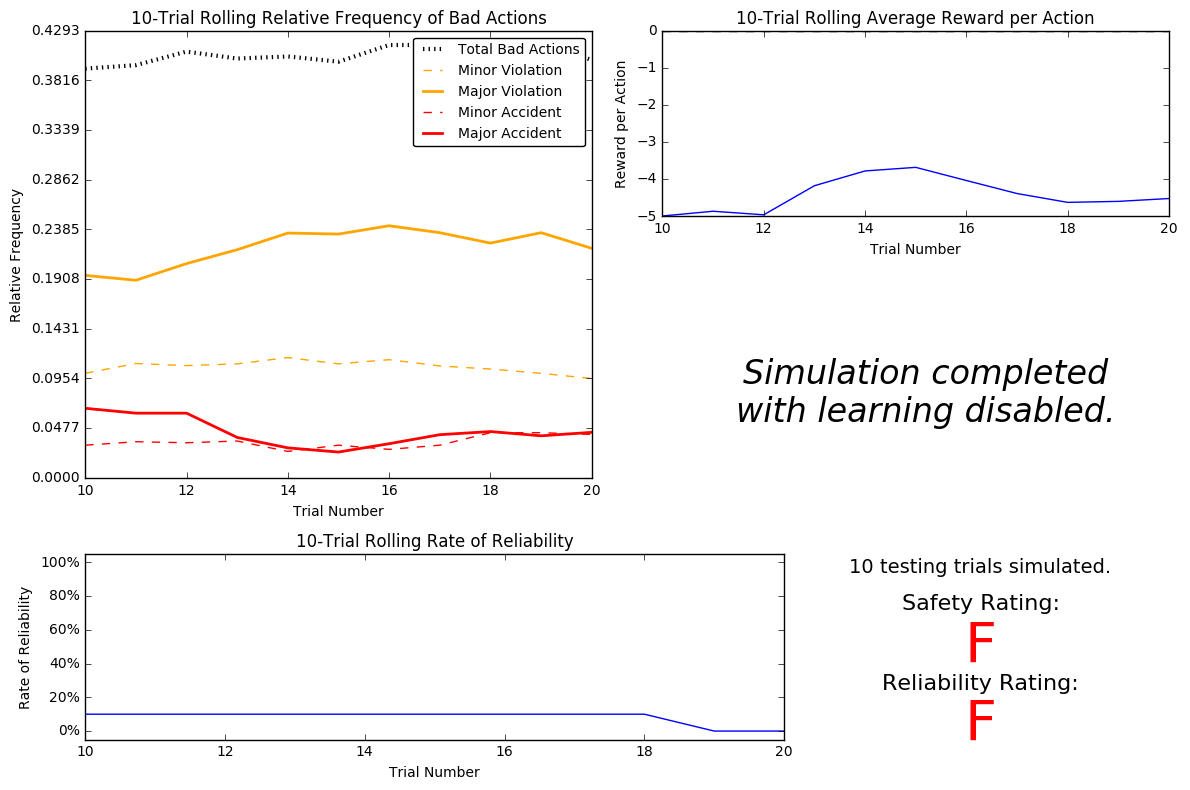

In [29]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

When the agent is not learning and just taking random actions, this results is a pretty poor smartcab—it gets an F in both safety and reliability. About 40% of the time, it's making a bad action, with about half of those resulting in a major violation, and about 10% of those bad actions resulting in a major accident. I would not get in a cab with those odds, especially given how many actions often need to be taken to reach a destination.

Furthermore, the cab only reaches it's destination before the deadline somewhere between 0-10% of the time. Again, while it makes sense, since the cab is choosing actions randomly, that it will often not find the destination in time, but, hey, it will sometimes. It's almost equally probably, though, that you'll get into a major accident. Not the cab for me.

Looking at the rewards per action panel, you can see that the environment, which determines the rewards for actions in a given state, is correctly penalizing all these bad actions. The agent is getting an average reward of -4 to -5 per action taken. 

Not surprisingly, since the "smartcab" is acting randomly, as the number of trials increases, the outcome of results doesn't change significantly.

Considering all of that, this cab wouldn't be considered safe or reliable—it frequently gets in accidents and rarely makes it to the destination before the deadline.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**
Of the features that are available in the environment state, initially, my instinct is that they all seem important for learning both safety and efficiency. Regarding safety, all of the inputs features, *light*, *left*, *right*, and *oncoming* since they all contain information that could guide the smartcab away from making unsafe actions.

If the smartcab wants to be equally safe and efficient, though—and defines safe as not disobeying traffic laws, even if there isn't any traffic coming—then you can probably disregard the *right* input, since you'll never need to consider that input to make good action decisions, since U.S. traffic laws obviate the knowledge of the intent of any car on the right—it can't end up in the same space, or create an accident, if everyone is obeying the laws.

Those features can help a smartcab learn how to be **safe**, but to also be **efficient**, it needs to combine that information with *waypoint*, so that the cab can choose to move in the right diretion to reach its destination.

I originally included *deadline* to learn both safety and efficiency, since I could imagine a scenario where a smartcab learns that incurring a major violation, for example, by running a red light, is favorable for reaching the destination before the deadline (assuming the intersection is clear of traffic) but after becoming more familiar with the reward code as well as considering the complexity of the state space this adds, I ultimately chose to not include it in my state space of *waypoint*, *light*, *left*, *oncoming*.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:** In Question 4, I originally suggested that we should use all 6 features to define the state, *waypoint*, *light*, *left*, *right*, *oncoming*, and *deadline*. There are 3 possible states for *waypoint*; 2 for *light*; 4 for each *left*, *right*, and *oncoming*. At this point, our state space is 384 unique states. Deadline is dependent on grid size, with a maximum of 5(maxDistance), or 5(x + y - 1), where x and y are the grid's dimensions. For the default environment, the grid is 8 by 6. This gives us 65 possible states for deadline, bringing our total state space to **24,960** unique states. Given that the current simulation ends after 124 steps, it would take hundreds, if not thousands, of training passes to even see each state, let alone reach those states multiple times, so our agent can learn. Based on that, I don't think this is tenable and we'll need to reduce our state space by removing some features, like *deadline* and *right* (for reasons describedin question 4), or do some feature engineering to produce a useful, but smaller state space.

Ultimately, I decided on using the features *waypoint*, *light*, *left*, *oncoming*, which has a state space of **96**, much better than our previous calculation.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

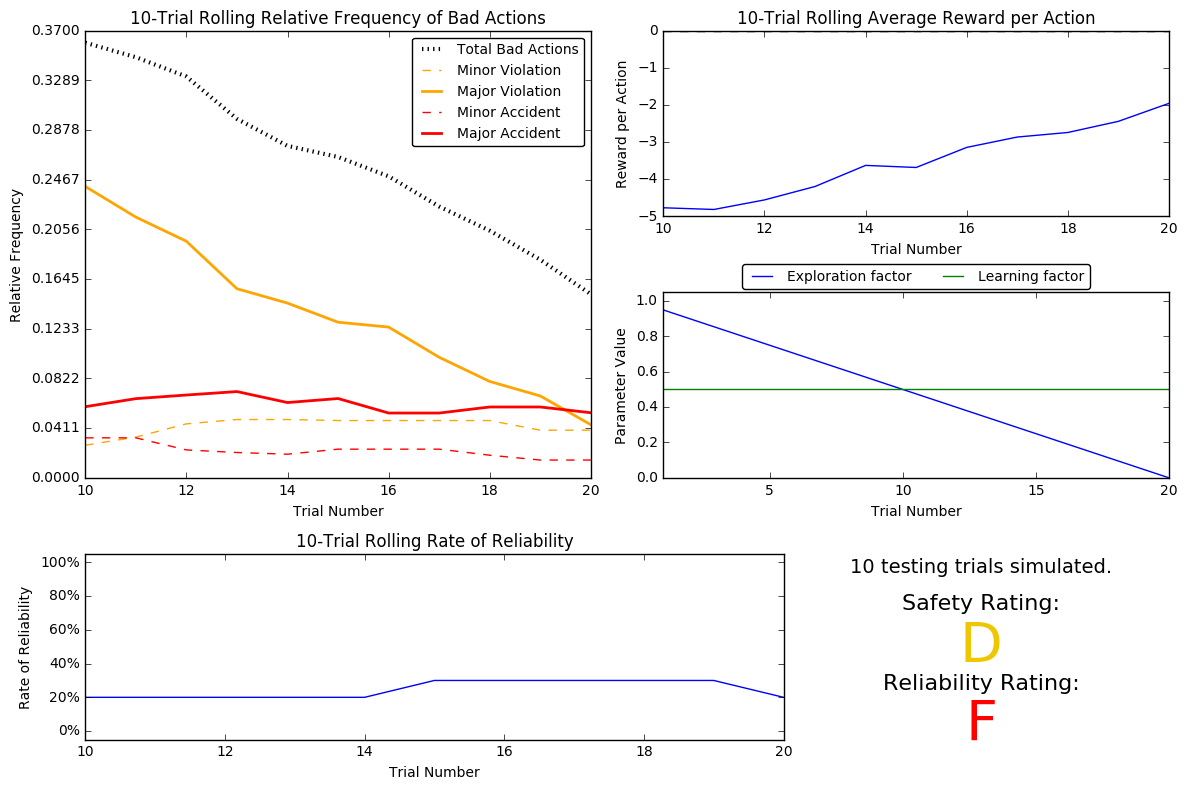

In [30]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**
Well, it's definitely learning! Compared to the agent that was taking random actions and made a roughly steady amount of "bad actions", this Q-learning agent is clearly learning, with the frequencey of bad actions starting around 37% and steadily decreasing to about 16% toward the end of it's training passes. Additionally, the average reward per action climbs from about -4 to -5 to -2. While the reliabilty chart isn't great, the average reliability also does seem to be slightly higher than the basic driving agent. The only observation that I see that are similar to the basic driving agent and the Q-learning agent where the charts start, which makes sense, since the Q-learning agent starts by behaving very simliarly to the basic agent, by randomly choosing actions. The difference is the Q-learning agent starts to exploit the past knowledge about rewards associated with actions and quickly begins to improve.

Because this is a learning agent, it continues training until its epsilon value is less than the epsilon tolerance. This resulted in 20 training trials. With an epsilon-tolerance of 0.05 and a linearly-diminishing decay function with a rate of -0.05, this makes sense.

This resulted in a safety rating of **D** and a reliability rating of **F** in the testing trials. It's better than the **F** and **F** of the basic driving agent, but still not a great smart cab. I would still be scared to ride in it, but since it gets a better safety rating, if I had to choose between the two, I'd definitely get in the Q-learning agent!

Finally, I see in the resulting Q table produced from this trial that there are still 188 state/action pairs with zero values, which indicates these have yet to be explored by the agent. This seems to indicate that in the upcoming optimization step, we should figure out how to get the Q-learning agent to explore more states, likely by running more training trials.

I also explored, instead of just randomly choosing an action to explore, favoring unexplored actions over previously explored action. Though there definitely is still value to exploring previously explored actions, it felt like the information gained from exploring an unexplored action is higher than exploring an action we've already taken at least once. I have removed this, though, because apparently it's important to explore all actions with equal probability in Q-learning, something I want to read more papers on, since I still feel like I was getting more positive results using this method.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

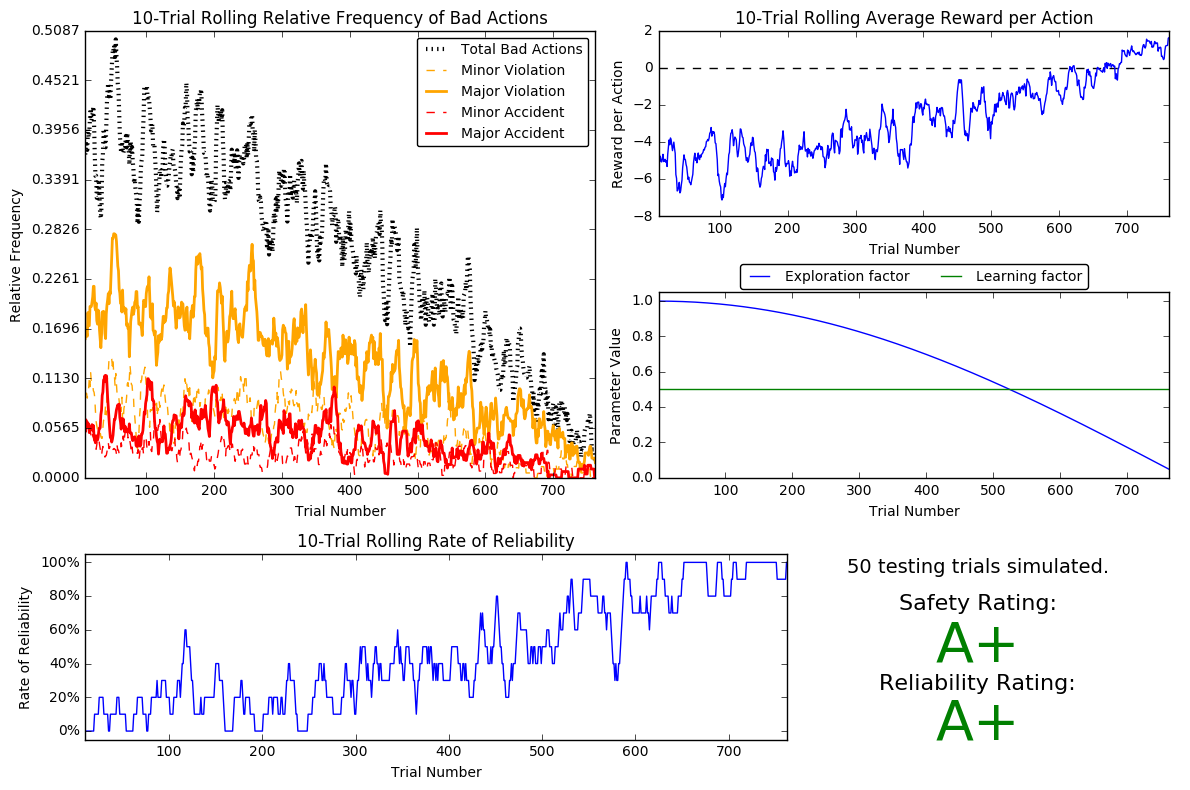

In [33]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**
Woo-hoo, now I've got a cab, I'd be happy to ride in!!!

I quickly achieved the A+/A+ rating by keeping the alpha at 0.5 and implementing the epsilon decay function $\epsilon = a^t, \textrm{for } a = 0.99$. This resulted in about 300 training trials before testing, compared to the 119 training trials used with the linear decay function used in the default Q-learner in the previous section. 

Not really satisfied with just 10 testing trials, I increased the n_test flag to 50, which increased the likliehood that my smartcab would experience more bad actions and miss the destination. Indeed, my overall grade for this smartcab suffered, so I sought out to explore if it was possible to get a Q-learner agent to get both A+ ratings for both safety and reliability when tested against 50 trials.

I experimented with lots of things: changing the epsilon decay constant, $a$; trying different decay functions: $\epsilon = e^{-at}$ and $\epsilon = \cos(at)$, with various values for $a$. These experiments resulted in agents that used between 300-600 training trials, but all were getting A+ safety ratings, but would usually fail to reach the destination in one of the 50 testing trials and would, therefore, get an A reliability rating. I knew I could probably just tweak the epsilon decay constatn, $a$, to yield more training, but I also wondered if there were other things I could do that would result in better precision in roughly the same amount of training time.

Looking at the graph for the $\epsilon = a^t, \textrm{for } a = 0.99$ decay rate, I could see that the agent started out exploring almost 100% of the time and then quickly descended into leveraging more of what it had learned until it gradualy reached the epsilon tolerance. This, even with values of $a$ that resulted in many training trials, still shoed a high number of 0.00 values in the Q-table. This indicated to me that, while smarter, the smartcab still could get into states where it had no experience for certain actions and, therefore, wouldn't be able to weigh those actions against the others properly.

Comparing that graph with the graph for the $\epsilon = \cos(at)$, I could see that the $\cos(at)$ decay function would result in keeping the probability of exploration higher longer before descending to the epsilon-tolerance. Based on the intuition that exploring more early on before trying to rely on learned knowledge would result in a more performant agent, I decided to focus on tuning that epsilon decay function.

The thing was, though, that even at very small values of $a$ and many training trials, my agent was still failing to hit arrive at the destination at least once in the 50 test trials and would therefore get an A instead of an A+. Looking at the Q-table, I was still seeing a lot of 0.00's, ~40. Intuiting that getting more exposure to state/action pairs would be better, even if they were less reinforced, I decided to modify my `'choose_action()'` function and the dependant `'choose_random_action()'` function to prefer exploring unexplored actions for a given state when exploring vs. when it is exploiting. This returns to even probability exploration of all actions once all actions have been explored once. This achieved what I was looking for: I got my A+/A+ for 50 trials and with only 382 training passes. Yay!

In order to use the more standard technique of action selection, though, I removed the favoring of unexplored actions and increased the number of training passes by changing the epsilon constant. After further tuning, I was able to still get an A+/A+ rating, but only after doing almost double the training passes, 762. Further study on if this optimization would make sense if you were constained on training time.

I should note that I also experimented with—and read a lot about—the learning rate. I ended up sticking with a 0.5 learning rate because, at the end of the day, I couldn't come up with a compelling intellectual argument for favoring the latest reward information over the older, previously learned Q-values. If the environmental rules were changing over time, I would probably increase it, though. I'll admit, though, this is one area I'm reading more papers about to better understand the when & why of learning rates.

I left the epsilon-tolerance fixed. Changing it seems like mostly another way to impact the lenghth of the training trials. Technically, it would increase the number of training trials done where the agent was primarily acting on learned values vs. exploring. I could see this as beneficial, but with the slope of decay with the $\cos(at)$ function, it didn't seem critical. If I were going for a higher number of tests and were looking for further optimizations, I could see modifying the decay function to decay more gradually toward the end and then experimenting with epsilon-tolerance, further.

Did it learn an acceptable policy? Well, aside from the A+/A+ rating, you can see a leveling off of reliability and reward per action charts. Both are indications the optimal policy was definitely approached, if not arrived at.

And, yes, I'm happy with my smartycab! :)

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 
As described above, there is a known optimal policy for this problem, namely the U.S. right-of-way traffic laws (and driving toward the intended destination). An example of what this policy would look like would be something like:

 * If I need to move forward to reach my destination,
   * If the light is green,
     * Move forward
   * If the light is red,
     * Don't move
     
Or, for a more complicated example, using more of the states information our agent is tracking in the Q-table, namely *waypoint*, *light*, *left*, *oncoming*:

 * If I need to move right to reach my destination,
   * If the light is green,
     * Move right
   * If the light is red,
     * If there is a car to the left that is going left,
       * Move right (at lest in our environment, in reality, this could be a little risky)
     * If there is a car to the left that is going right,
       * Move right
     * If there is a care to the lef that is moving forward,
       * Don't move
     * If the there isn't a car to the left,
       * Move right
       
Both of these would be considered optimal policies (though the second one could be simplified).


Looking through the Q-table, most of the policies that can be derived match what would be the optimal policy for the environment. For example, one entry:

`('forward', 'red', None, None)
 -- forward : -17.05
 -- right : 0.20
 -- None : 2.06
 -- left : -10.37`
 
In this scenario, the cab comes across a red light, it wants to go forward, there isn't any oncoming traffic or traffic to the left, so the optimal policy is to stop and wait for the light. Since the highest value is *None*, this is indeed what our smartcab would do.

While that's nice and most state result in correct decisions, there were a couple cases where that wasn't true. One case that I was able to find that doesn't seem to be the optimal policy is the following:

`('right', 'red', None, None)
 -- forward : -10.38
 -- right : 1.11
 -- None : 1.42
 -- left : -9.82`
 
In this case, the car needs to go right, the light is red, and there is no oncoming traffic or traffic coming from the left. I would expect the optimal policy to turn right. The Q-table, though would have the car idle. While that won't result in an accident, nor cause it to move away from the destination, it is inefficient and the car should get a minor violoation.

Another example of where the Q-table doesn't quite have the right policy is when the car wants to go forward, the light is green, the car on the left wants to go right and the oncoming car wants to turn right.

`('forward', 'green', 'right', 'right')
 -- forward : 0.00
 -- right : 1.01
 -- None : 0.00
 -- left : -15.06`
 
 The Q-table would cause the smartcab to go right, not forward. 
 
 


-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**
The Q-learning algorithm's value iteration update rule includes a component that represents the notion of future rewards for choosing an action and ending up in the resulting state. In many Q-learning problems, this component is critical, since you are usually trying to get to an ultimate goal that has a large reward. While the goal with the large reward is present in this problem—if you don't get to the goal often enough, you'll get an F for reliability—based on how the problem is set up, it doesn't make sense to include this component in the value itreation update rule.

First, given the inputs the car has to build state, it has no information about the ultimate destination, or goal state, beyond the *waypoint* that it should go next. This means that the smartcab, given the environmental inputs, simply doesn't have enough information to even be able to comprehend if a given resutling state, or s', is better or worse in terms of future rewards. It doesn't know relative distance to the destination state, it doesn't know if there is less traffic this way vs. that way, etc. So, while it's possible to imagine a smartcab in the real world being able, and probably desiring, to consider the future rewards part of the equation, it's not relevant given this set up.

Additionally, the way the environment changes every time a new trial starts. This means that cars are in different locations, the destination is in different locations, and the smartcab starts in different locations. The only thing that is constant between trials is the rewards model for making choices at a given step. Becasue of this, even if we were able to include more sensory information for a given trial that would enable the smartcab to consider future rewards, it still wouldn't make much sense to do so, since anything it learned about the future reward state for a given trial would be irrelevant for the subsequent trials and ultimate tests.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.